# **Program 5**

Prepare a linear regression model for prediction of resale car price.

Model coefficients: [ 7.26831852e+11 -2.50610352e-01 -2.32537818e-01  7.38776447e-02
  4.70141495e-02  7.26831852e+11  6.62815814e-02  8.59178586e-01
 -7.22882618e-03 -7.02099753e-03  7.03528760e-03  1.32983308e-01
  1.49877118e-02 -6.86552095e-03 -3.59124005e-03 -1.61993065e-02
 -2.35818239e-02]
Model intercept: -726831852169.8219
Model R^2 score on test set: 0.9459835819294395


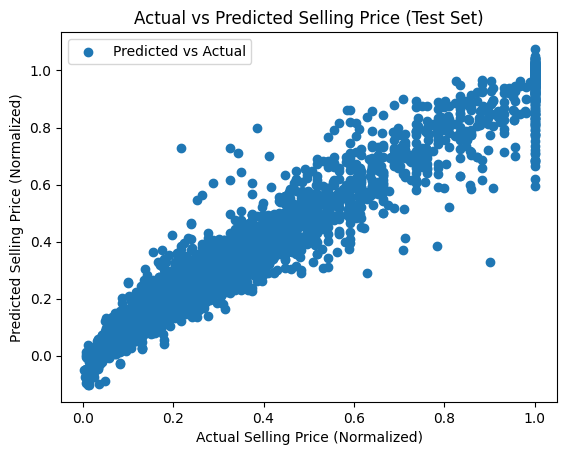

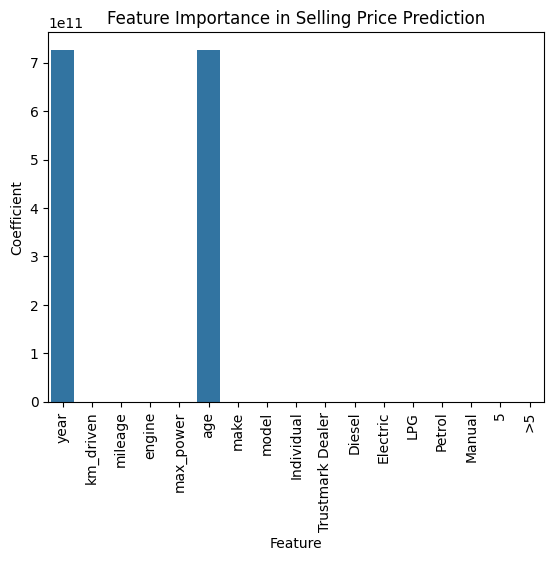

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset
df = pd.read_csv('cars24-car-price-cleaned.csv')

# replace 'make' and 'model' columns with the mean selling price for each group
df['make'] = df.groupby('make')['selling_price'].transform('mean')
df['model'] = df.groupby('model')['selling_price'].transform('mean')

# normalize the dataset using MinMaxScaler to scale features between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# define target variable 'y' as the selling price and features 'x' by dropping the selling price
y = df_normalized['selling_price']
x = df_normalized.drop('selling_price', axis=1)

# split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# initialize and train the Linear Regression model on the training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

# predict the target variable for the test set
y_test_predict = model.predict(x_test)

# Display model's coefficient, intercept, and R^2 score on test set
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)
print("Model R^2 score on test set:", model.score(x_test, y_test))

# Scatter plot to visualize the relationship between predicted and actual values in the test set
#plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_predict, label="Predicted vs Actual")
plt.xlabel("Actual Selling Price (Normalized)")
plt.ylabel("Predicted Selling Price (Normalized)")
plt.title("Actual vs Predicted Selling Price (Test Set)")
plt.legend()
plt.show()

# Bar plot to display the importance of each feature based on model coefficients
imp = pd.DataFrame(list(zip(x_test.columns, np.abs(model.coef_))), columns=['Feature', 'Coefficient'])
#plt.figure(figsize=(8, 6))
sns.barplot(x='Feature', y='Coefficient', data=imp)
plt.xticks(rotation=90)
plt.title("Feature Importance in Selling Price Prediction")
plt.show()